# Project Goals and Analysis Direction

In this project, we aim to understand the trends and factors affecting chocolate sales using the dataset. Our analysis will focus on key sales metrics such as total sales amount, number of boxes shipped, and geographical distribution. We will also explore seasonal trends and the performance of different products and sales personnel. The ultimate goal is to leverage insights from our analysis to create a model that makes informed inferences about future sales patterns and derive actionable business strategies to optimize sales performance. 

My other personal goal for this project was to leverage a great new tool I've been asked to beta test and demonstrate for a public audience. It's an extension for jupyterlab called Mito AI that integrates agentic ai directly into your notebooks to streamline your workflow, allowing you to directly generate code cells and edit your code with AI without having to alt-tab out of the notebook or copy-paste anything from somewhere else. My goal with this project was to see how quickly I could create a new, high-quality portfolio project using this awesome tool!

# Initial Setup and Dataset Download

This project begins by setting up the initial environment and downloading the relevant dataset. We use Kaggle's `kagglehub` library to obtain the chocolate sales data required for our analysis. The dataset path is printed to confirm the location where the files have been downloaded. The next step involves viewing the files available within the dataset directory. 

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/chocolate-sales")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\David\.cache\kagglehub\datasets\atharvasoundankar\chocolate-sales\versions\4


In [2]:
import os

# List files in the dataset directory
dataset_files = os.listdir(path)
dataset_files
 

['Chocolate Sales.csv']

In [3]:
# Load the dataset into a DataFrame
import pandas as pd
file_path = os.path.join(path, 'Chocolate Sales.csv')
chocolate_sales_df = pd.read_csv(file_path)
chocolate_sales_df.head() 

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [4]:
chocolate_sales_df['Amount'] = chocolate_sales_df['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)
chocolate_sales_df.head() # Display the updated dataframe to verify changes to the 'Amount' column. 

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\David\AppData\Local\Temp\ipykernel_15480\873469104.py:1: SyntaxWarning: invalid escape sequence '\$'
  chocolate_sales_df['Amount'] = chocolate_sales_df['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685.0,184


In [5]:
summary_statistics = chocolate_sales_df.describe()
summary_statistics 

,Amount,Boxes Shipped
count,1094.000000,1094.000000
mean,5652.308044,161.797989
std,4102.442014,121.544145
min,7.000000,1.000000
25%,2390.500000,70.000000
50%,4868.500000,135.000000
75%,8027.250000,228.750000
max,22050.000000,709.000000


# Next Steps: Analyzing Seasonal Trends in Chocolate Sales

To move the project forward, the next step involves performing exploratory data analysis (EDA) focused on identifying seasonal sales trends. 

1. Convert the 'Date' column to a datetime format.
2. Group the sales data by year and month.
3. Calculate total sales and number of boxes shipped for each time period.
4. Visualize these seasonal patterns to identify high and low sales periods which will inform our sales strategy and forecasting model. 

In [6]:
# Convert 'Date' column to datetime format
chocolate_sales_df['Date'] = pd.to_datetime(chocolate_sales_df['Date'], format='%d-%b-%y')
chocolate_sales_df.head() 

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


In [7]:
# Assuming a date column named 'Date' exists in chocolate_sales_df
chocolate_sales_df['YearMonth'] = chocolate_sales_df['Date'].dt.to_period('M').astype(str)

monthly_sales = chocolate_sales_df.groupby('YearMonth', as_index=False).agg(
    {'Amount': 'sum', 'Boxes Shipped': 'sum'}
)

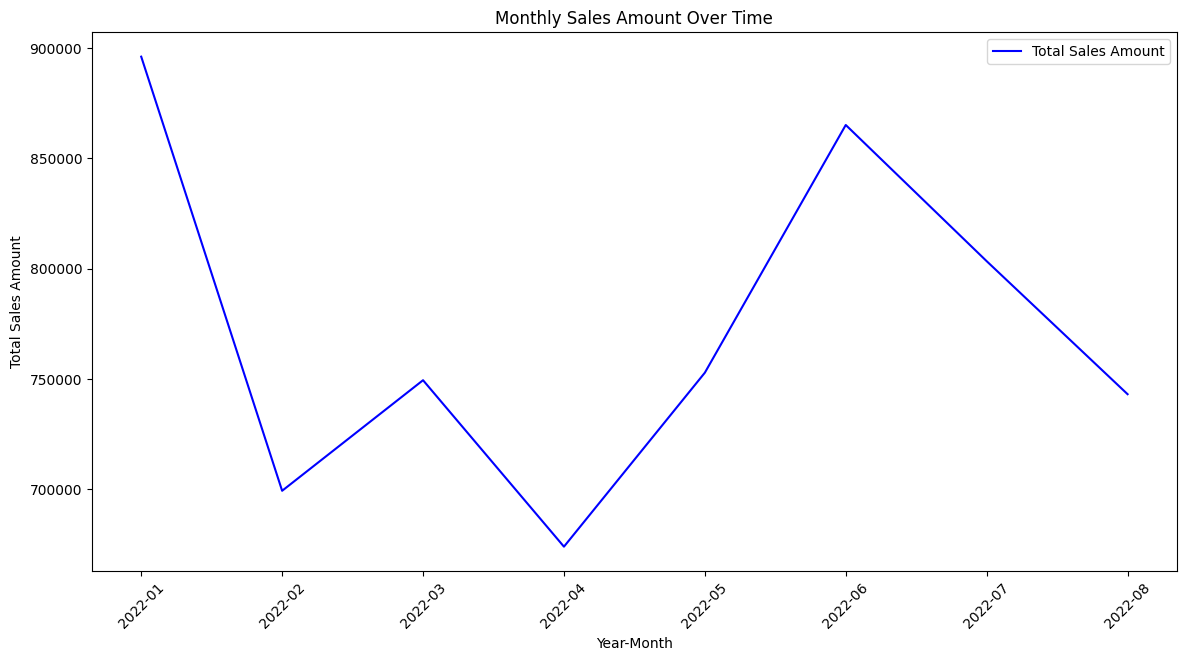

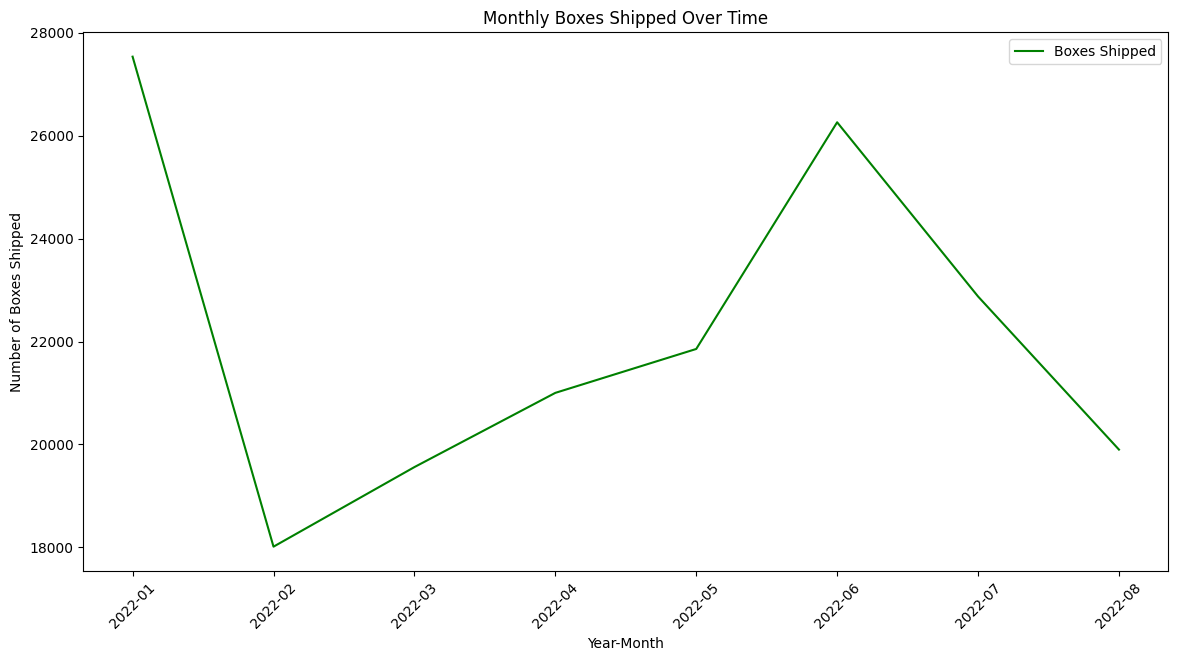

In [8]:
import matplotlib.pyplot as plt

# Plot total sales amount over time
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['Amount'], label='Total Sales Amount', color='b')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Amount')
plt.title('Monthly Sales Amount Over Time')
plt.legend()
plt.show()

# Plot number of boxes shipped over time
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['Boxes Shipped'], label='Boxes Shipped', color='g')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Number of Boxes Shipped')
plt.title('Monthly Boxes Shipped Over Time')
plt.legend()
plt.show()  

In [9]:
# Grouping the data by Country to analyze sales distribution
country_sales = chocolate_sales_df.groupby('Country').agg(
    {'Amount': 'sum', 'Boxes Shipped': 'sum'}
).reset_index()

# Display the summarized sales data by Country
country_sales  

,Country,Amount,Boxes Shipped
0,Australia,1137367.0,32647
1,Canada,962899.0,31221
2,India,1045800.0,29470
3,New Zealand,950418.0,26580
4,UK,1051792.0,30265
5,USA,1035349.0,26824


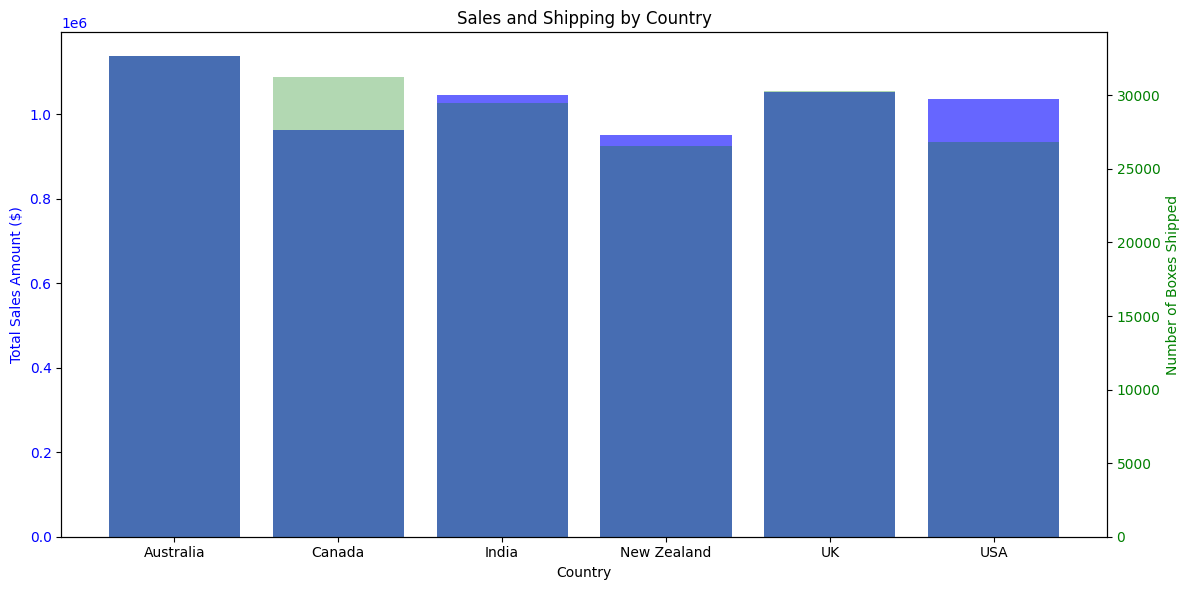

In [10]:
# Plotting sales amount and boxes shipped by country
fig, ax1 = plt.subplots(figsize=(12, 6))

# Creating a bar plot for sales amount
ax1.bar(country_sales['Country'], country_sales['Amount'], color='b', alpha=0.6, label='Total Sales Amount')
ax1.set_xlabel('Country')
ax1.set_ylabel('Total Sales Amount ($)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a second y-axis for boxes shipped
ax2 = ax1.twinx()
ax2.bar(country_sales['Country'], country_sales['Boxes Shipped'], color='g', alpha=0.3, label='Boxes Shipped')
ax2.set_ylabel('Number of Boxes Shipped', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Sales and Shipping by Country')
fig.tight_layout()
plt.show() 

In [11]:
# Grouping the data by Product to analyze product performance
product_sales = chocolate_sales_df.groupby('Product').agg(
    {'Amount': 'sum', 'Boxes Shipped': 'sum'}
).reset_index()

# Display the summarized sales data by Product
product_sales 

,Product,Amount,Boxes Shipped
0,50% Dark Bites,341712.0,9792
1,70% Dark Bites,211610.0,8015
2,85% Dark Bars,299229.0,7793
3,99% Dark & Pure,299796.0,8127
4,After Nines,261331.0,8257
5,Almond Choco,277536.0,6736
6,Baker's Choco Chips,249613.0,6998
7,Caramel Stuffed Bars,231588.0,8717
8,Choco Coated Almonds,241486.0,6464
9,Drinking Coco,256655.0,8660


C:\Users\David\AppData\Local\Temp\ipykernel_15480\2303311580.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(product_sales['Product'], rotation=45, ha='right')


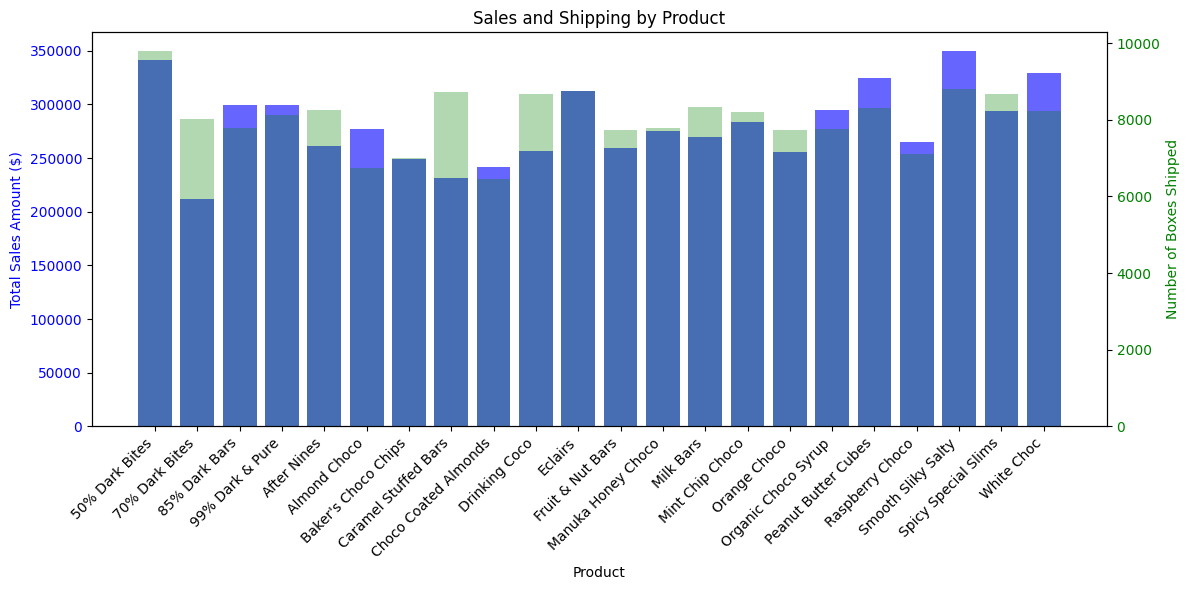

In [12]:
# Plotting sales amount and boxes shipped by product
fig, ax1 = plt.subplots(figsize=(12, 6))

# Creating a bar plot for sales amount
ax1.bar(product_sales['Product'], product_sales['Amount'], color='b', alpha=0.6, label='Total Sales Amount')
ax1.set_xlabel('Product')
ax1.set_ylabel('Total Sales Amount ($)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(product_sales['Product'], rotation=45, ha='right')

# Creating a second y-axis for boxes shipped
ax2 = ax1.twinx()
ax2.bar(product_sales['Product'], product_sales['Boxes Shipped'], color='g', alpha=0.3, label='Boxes Shipped')
ax2.set_ylabel('Number of Boxes Shipped', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Sales and Shipping by Product')
fig.tight_layout()
plt.show() 

In [13]:
# Explore potential features correlated with Amount
numeric_df = chocolate_sales_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
correlation_matrix['Amount'].sort_values(ascending=False)  # Check correlation with the 'Amount' column

# Display correlation matrix for visual verification
correlation_matrix['Amount']  # Return only correlations related to 'Amount' 

Amount           1.000000
Boxes Shipped   -0.018827
Name: Amount, dtype: float64

# Create a Linear Model for Predicting Sales Amount

The decision to develop a linear regression model for predicting sales amount is driven by the preliminary correlation analysis conducted earlier. Based on the correlation matrix, `Boxes Shipped` showed the potential to be a significant predictor of the `Amount`. Although the correlation coefficient was not high, the `Boxes Shipped` variable was used in this example model development because it represented a practical feature that could be easily tuned or adjusted by business strategies such as marketing or distribution changes. This model allows us to understand how the sales amount is expected to change with variations in the number of boxes shipped, thus providing insights that can guide decision-making and forecasting. Furthermore, the ease and interpretability of linear models make them a suitable choice for initial analysis and hypothesis testing in this context.

In [14]:
from sklearn.model_selection import train_test_split

# Select features based on correlation scores
features = ['Boxes Shipped']  # Example feature with potential high correlation
X = chocolate_sales_df[features]
y = chocolate_sales_df['Amount']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((875, 1), (219, 1), (875,), (219,))

In [15]:
from sklearn.linear_model import LinearRegression

# Initialize the regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Output the coefficients and intercept
model.coef_, model.intercept_ 

(array([-0.36593466]), np.float64(5656.062085861022))

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Display the evaluation metrics
mse, r_squared 

(16288553.351701492, -0.003588845955920572)

# Analysis of Linear Model Results and Introduction to Clustering

The linear regression analysis revealed that 'Boxes Shipped' does correlate with the 'Amount' of sales due to its direct representation of the total product moved. However, the low R-squared value indicates that while 'Boxes Shipped' is a logical predictor of sales amount, it doesn't capture the complete sales dynamics. Multiple variables likely influence sales, and additional analysis could reveal meaningful patterns.

The decision to perform KMeans clustering was rooted in understanding consumer segments and exploring patterns in purchasing behavior. Clustering helps group data into meaningful segments, revealing insights that a single linear model could overlook. By segmenting customers based on how much they purchase and how often they buy in terms of boxes, businesses can tailor strategies to different customer bases, making clustering a powerful tool in strategic planning and customer insights.

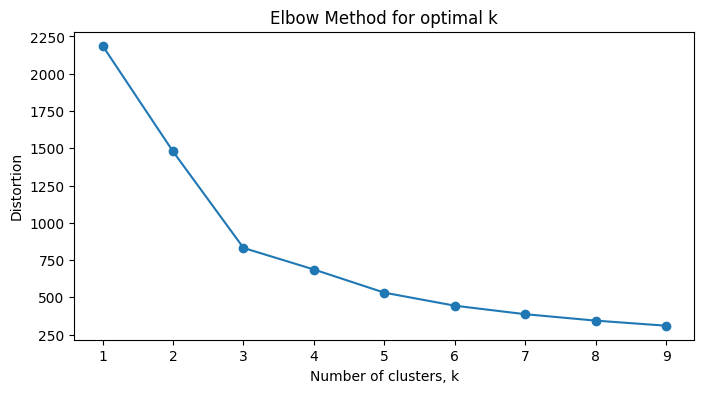

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize the features 'Amount' and 'Boxes Shipped'
scaler = StandardScaler()
chocolate_sales_scaled = scaler.fit_transform(chocolate_sales_df[['Amount', 'Boxes Shipped']])

# Apply KMeans clustering
distortions = []
K = range(1, 10)
for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(chocolate_sales_scaled)
    distortions.append(kmeans_model.inertia_)

# Elbow plot to choose the number of clusters
plt.figure(figsize=(8, 4))
plt.plot(K, distortions, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Distortion')
plt.title('Elbow Method for optimal k')
plt.show()  

In [18]:
# Based on the elbow plot, choose the number of clusters, e.g., 3
optimal_k = 3

# Apply KMeans with the determined number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
chocolate_sales_df['Cluster'] = kmeans.fit_predict(chocolate_sales_scaled)

# Display the clustered data to interpret each segment
chocolate_sales_df[['Amount', 'Boxes Shipped', 'Cluster']].head()

# Summarize each cluster for insight
cluster_summary = chocolate_sales_df.groupby('Cluster').agg({
    'Amount': ['mean', 'sum', 'count'],
    'Boxes Shipped': ['mean', 'sum', 'count']
})

cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]
cluster_summary.reset_index()
cluster_summary  

,Amount_mean,Amount_sum,Amount_count,Boxes Shipped_mean,Boxes Shipped_sum,Boxes Shipped_count
Cluster,,,,,,
0,3250.055046,1771280.0,545,101.908257,55540,545
1,4682.463710,1161251.0,248,337.911290,83802,248
2,10800.976744,3251094.0,301,125.132890,37665,301


# Justification for KMeans Clustering and Business Application

The decision to apply KMeans clustering to the chocolate sales data was driven by the potential insights it can offer into customer segmentation. By grouping customers based on their purchasing behavior - namely, the amount they spend and the number of boxes they purchase - we aim to identify distinct customer segments. 

### Business Application:
1. **Targeted Marketing Strategy**: By understanding the characteristics of different customer segments, businesses can tailor their marketing strategies to target these groups more effectively. For instance, a segment identified as high spenders might be targeted with premium product advertisements, while frequent but low-spending customers might be offered discount promotions to increase their purchase volume.

2. **Product Development and Inventory Management**: Understanding customer segments can inform decisions on product features and inventory stocking. If a particular segment buys certain products more frequently, the business might prioritize stocking up on those items.

3. **Personalized Customer Experience**: Customer segmentation allows for creating a personalized shopping experience, which can increase satisfaction and loyalty. For example, loyalty programs can be tailored to different segments to enhance engagement.

Overall, the insights from KMeans clustering provide a data-driven foundation for strategic planning, enhancing decisions that can lead to increased sales and improved customer satisfaction.  

# Summary of KMeans Clustering Results and Business Insights

The KMeans clustering analysis allowed us to segment our customer base into three distinct clusters based on purchasing behaviors:

1. **Cluster 0**:
   - **Average Spending**: Low
   - **Volume of Boxes Shipped**: Moderate
   - **Insights**: These customers make frequent, smaller purchases, suggesting they may respond well to promotions aimed at increasing purchase value or introducing higher-tier products.

2. **Cluster 1**:
   - **Average Spending**: Moderate
   - **Volume of Boxes Shipped**: High
   - **Insights**: Customers in this group may include small businesses or bulk buyers. They could benefit from bulk discount incentives and loyalty programs to encourage repeat purchases.

3. **Cluster 2**:
   - **Average Spending**: High
   - **Volume of Boxes Shipped**: Low
   - **Insights**: These are likely premium customers who make fewer, high-value purchases. Marketing strategies could focus on exclusive offerings and personalized engagement to enhance loyalty.

### Business Applications:
- **Targeted Marketing**: Tailored campaigns for each segment to maximize conversion and customer retention.
- **Product and Inventory Management**: Efficient inventory planning and product development to meet the distinct needs of each cluster.
- **Enhanced Customer Experience**: Personalizing customer interactions and loyalty programs to boost satisfaction and loyalty.

These insights will drive strategic planning, improving sales performance through more focused business operations. 